In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dynamic_routing_analysis import spike_utils, plot_utils
import os

%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
#load data
regenerate_table=False
all_data_loadpath=r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined\all_data_plus_performance.pkl"

if regenerate_table:
    savepath=r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\combined"
    stim_context_loadpath = r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics"
    lick_loadpath = r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\new_annotations\single unit metrics\lick_modulation"
    performance_loadpath = os.path.join(savepath,"performance_dict.pkl")
    spike_utils.concat_single_unit_metrics_across_sessions(stim_context_loadpath=stim_context_loadpath,lick_loadpath=lick_loadpath,
                                                           performance_loadpath=None,savepath=savepath)

all_data = pd.read_pickle(all_data_loadpath)


In [4]:
sel_project='DynamicRouting'
sel_units=all_data.query('presence_ratio>=0.99 and \
                            isi_violations_ratio<=0.1 and \
                            amplitude_cutoff<=0.1 and \
                            project.str.contains(@sel_project) and \
                            ~structure.isna() and ~location.isna() and \
                            n_good_blocks>=4')

adj_pvals=spike_utils.calculate_single_unit_metric_adjusted_pvals(sel_units,sel_project)

## stimulus modulation

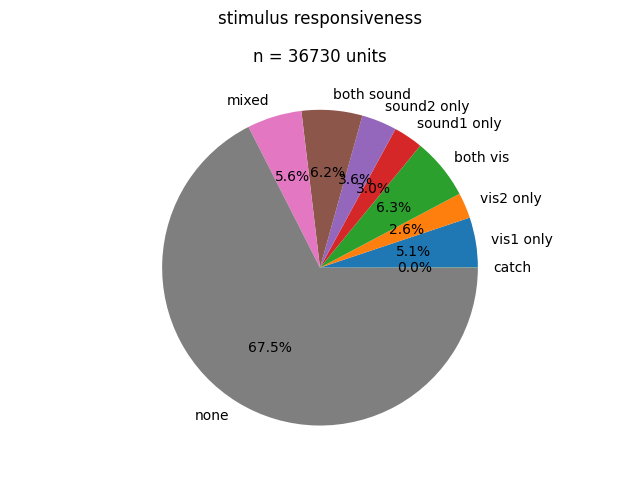

In [5]:
#plot overall stimulus modulation
plot_utils.plot_stimulus_modulation_pie_chart(adj_pvals,sel_project)

In [6]:
#calculate stimulus modulation by region
area_fraction_responsive_to_stim = spike_utils.calculate_stimulus_modulation_by_area(sel_units,sel_project,plot_figures=False,savepath=None)

C:\Users\ethan.mcbride\Code\dynamic_routing_analysis\src\dynamic_routing_analysis\spike_utils.py:1303: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1095890410958904' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  area_fraction_responsive_to_stim.iloc[rr,1:-5]=row.iloc[1:-5]/row['total_n']
C:\Users\ethan.mcbride\Code\dynamic_routing_analysis\src\dynamic_routing_analysis\spike_utils.py:1303: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.17123287671232876' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  area_fraction_responsive_to_stim.iloc[rr,1:-5]=row.iloc[1:-5]/row['total_n']
C:\Users\ethan.mcbride\Code\dynamic_routing_analysis\src\dynamic_routing_analysis\spike_utils.py:1303: FutureWarning: Setting an item of incompatible dtype is depr

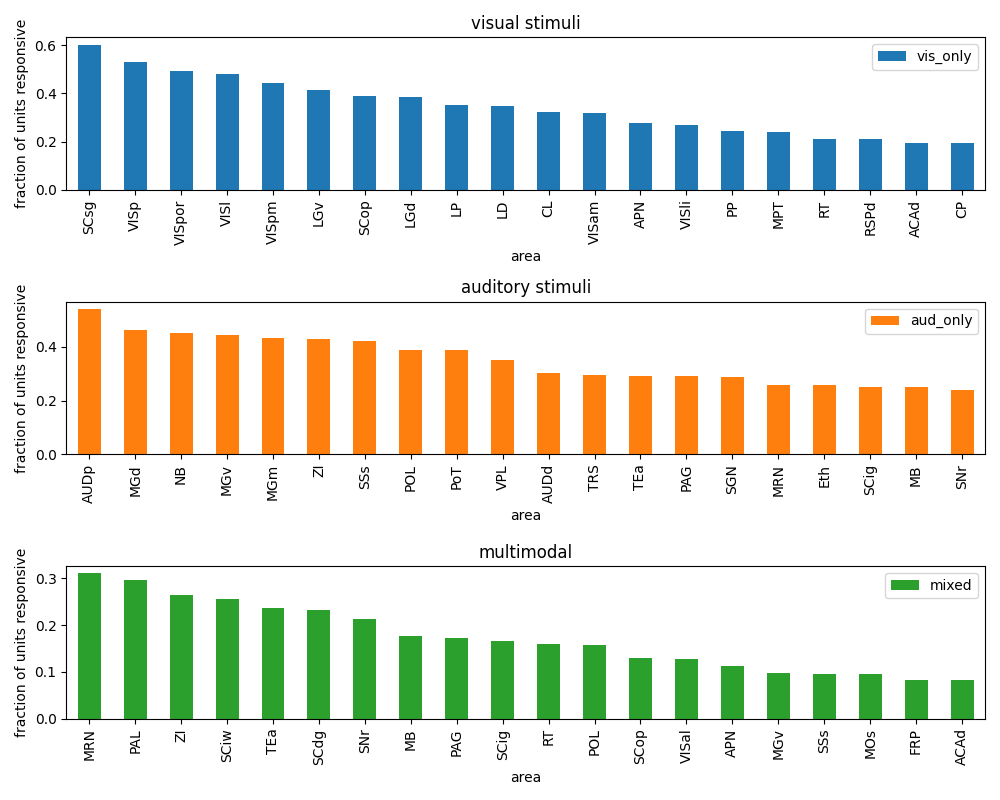

In [7]:
#plot top 20 stimulus modulated regions

#stimulus:
fig,ax=plt.subplots(3,1,figsize=(10,8))
#vis: vis1+vis1+both_vis
vis_resp=area_fraction_responsive_to_stim[['vis1','vis2','both_vis']].sum(axis=1)
area_fraction_responsive_to_stim['vis_only']=vis_resp
sort_by_vis=area_fraction_responsive_to_stim.query('total_n>=30 and n_sessions>=3').sort_values(by='vis_only',ascending=False).head(20)
sort_by_vis[['area','vis_only']].plot.bar(ax=ax[0],x='area',y='vis_only',color='tab:blue')
ax[0].set_title('visual stimuli')
ax[0].set_ylabel('fraction of units responsive')

#aud: sound1+sound2+both_sound
aud_resp=area_fraction_responsive_to_stim[['sound1','sound2','both_sound']].sum(axis=1)
area_fraction_responsive_to_stim['aud_only']=aud_resp
sort_by_aud=area_fraction_responsive_to_stim.query('total_n>=30 and n_sessions>=3').sort_values(by='aud_only',ascending=False).head(20)
sort_by_aud[['area','aud_only']].plot.bar(ax=ax[1],x='area',y='aud_only',color='tab:orange')
ax[1].set_title('auditory stimuli')
ax[1].set_ylabel('fraction of units responsive')

#mixed: mixed
sort_by_mixed=area_fraction_responsive_to_stim.query('total_n>=30 and n_sessions>=3').sort_values(by='mixed',ascending=False).head(20)
sort_by_mixed[['area','mixed']].plot.bar(ax=ax[2],x='area',y='mixed',color='tab:green')
ax[2].set_title('multimodal')
ax[2].set_ylabel('fraction of units responsive')

fig.tight_layout()


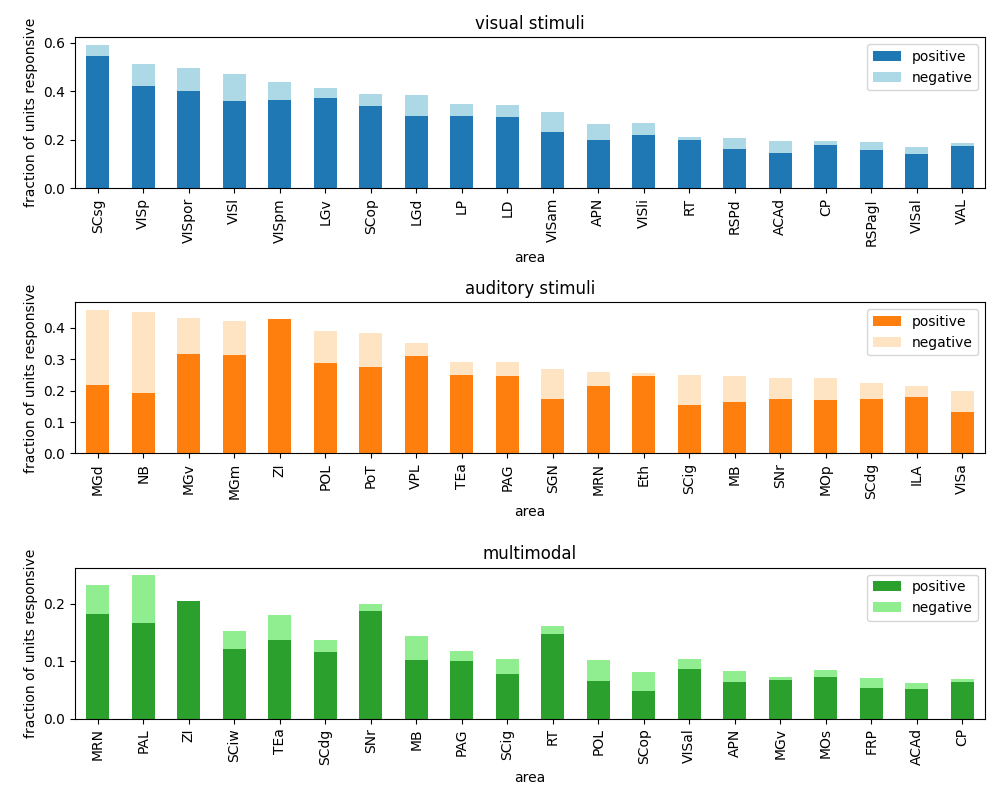

In [8]:
#plot top 20 stimulus modulated areas, including sign of modulation

#stimulus:
fig,ax=plt.subplots(3,1,figsize=(10,8))
#vis: vis1+vis1+both_vis
vis_pos_resp=area_fraction_responsive_to_stim[['vis1_pos','vis2_pos','both_vis_pos']].sum(axis=1)
area_fraction_responsive_to_stim['vis_pos_only']=vis_pos_resp
vis_neg_resp=area_fraction_responsive_to_stim[['vis1_neg','vis2_neg','both_vis_neg']].sum(axis=1)
area_fraction_responsive_to_stim['vis_neg_only']=vis_neg_resp
vis_resp=area_fraction_responsive_to_stim[['vis1','vis2','both_vis']].sum(axis=1)
area_fraction_responsive_to_stim['vis_only']=vis_resp

sort_by_vis=area_fraction_responsive_to_stim.query('total_n>=30 and n_sessions>=4').sort_values(by='vis_only',ascending=False).head(20)
sort_by_vis[['area','vis_pos_only','vis_neg_only']].plot.bar(ax=ax[0],x='area',stacked=True,color=['tab:blue','lightblue'])
ax[0].set_title('visual stimuli')
ax[0].set_ylabel('fraction of units responsive')
ax[0].legend(['positive','negative'])

#aud: sound1+sound2+both_sound
aud_pos_resp=area_fraction_responsive_to_stim[['sound1_pos','sound2_pos','both_sound_pos']].sum(axis=1)
area_fraction_responsive_to_stim['aud_pos_only']=aud_pos_resp
aud_neg_resp=area_fraction_responsive_to_stim[['sound1_neg','sound2_neg','both_sound_neg']].sum(axis=1)
area_fraction_responsive_to_stim['aud_neg_only']=aud_neg_resp
aud_resp=area_fraction_responsive_to_stim[['sound1','sound2','both_sound']].sum(axis=1)
area_fraction_responsive_to_stim['aud_only']=aud_resp

sort_by_aud=area_fraction_responsive_to_stim.query('total_n>=30 and n_sessions>=4').sort_values(by='aud_only',ascending=False).head(20)
sort_by_aud[['area','aud_pos_only','aud_neg_only']].plot.bar(ax=ax[1],x='area',stacked=True,color=['tab:orange','bisque'])
ax[1].set_title('auditory stimuli')
ax[1].set_ylabel('fraction of units responsive')
ax[1].legend(['positive','negative'])

#mixed: mixed
mixed_pos_resp=area_fraction_responsive_to_stim[['mixed_pos']].sum(axis=1)
area_fraction_responsive_to_stim['mixed_pos_only']=mixed_pos_resp
mixed_neg_resp=area_fraction_responsive_to_stim[['mixed_neg']].sum(axis=1)
area_fraction_responsive_to_stim['mixed_neg_only']=mixed_neg_resp
mixed_resp=area_fraction_responsive_to_stim[['mixed']].sum(axis=1)
area_fraction_responsive_to_stim['mixed_only']=mixed_resp

sort_by_mixed=area_fraction_responsive_to_stim.query('total_n>=30 and n_sessions>=4').sort_values(by='mixed',ascending=False).head(20)
sort_by_mixed[['area','mixed_pos_only','mixed_neg_only']].plot.bar(ax=ax[2],x='area',stacked=True,color=['tab:green','lightgreen'])
ax[2].set_title('multimodal')
ax[2].set_ylabel('fraction of units responsive')
ax[2].legend(['positive','negative'])

fig.tight_layout()


## context, stimulus, and lick modulation

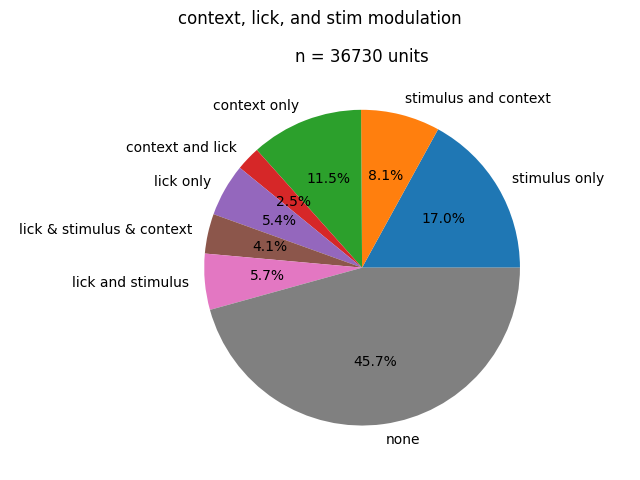

In [9]:
# #plot overall context, stim, lick modulation
plot_utils.plot_context_stim_lick_modulation_pie_chart(adj_pvals,sel_project)

In [10]:
#calculate context, lick, stimulus modulation by region
area_fraction_context_mod=spike_utils.compute_context_stim_lick_modulation_by_area(sel_units,sel_project,plot_figures=False,savepath=None)

C:\Users\ethan.mcbride\Code\dynamic_routing_analysis\src\dynamic_routing_analysis\spike_utils.py:1469: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5753424657534246' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  area_fraction_context_mod.iloc[rr,1:-5]=row.iloc[1:-5]/row['total_n']
C:\Users\ethan.mcbride\Code\dynamic_routing_analysis\src\dynamic_routing_analysis\spike_utils.py:1469: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3904109589041096' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  area_fraction_context_mod.iloc[rr,1:-5]=row.iloc[1:-5]/row['total_n']
C:\Users\ethan.mcbride\Code\dynamic_routing_analysis\src\dynamic_routing_analysis\spike_utils.py:1469: FutureWarning: Setting an item of incompatible dtype is deprecated and will

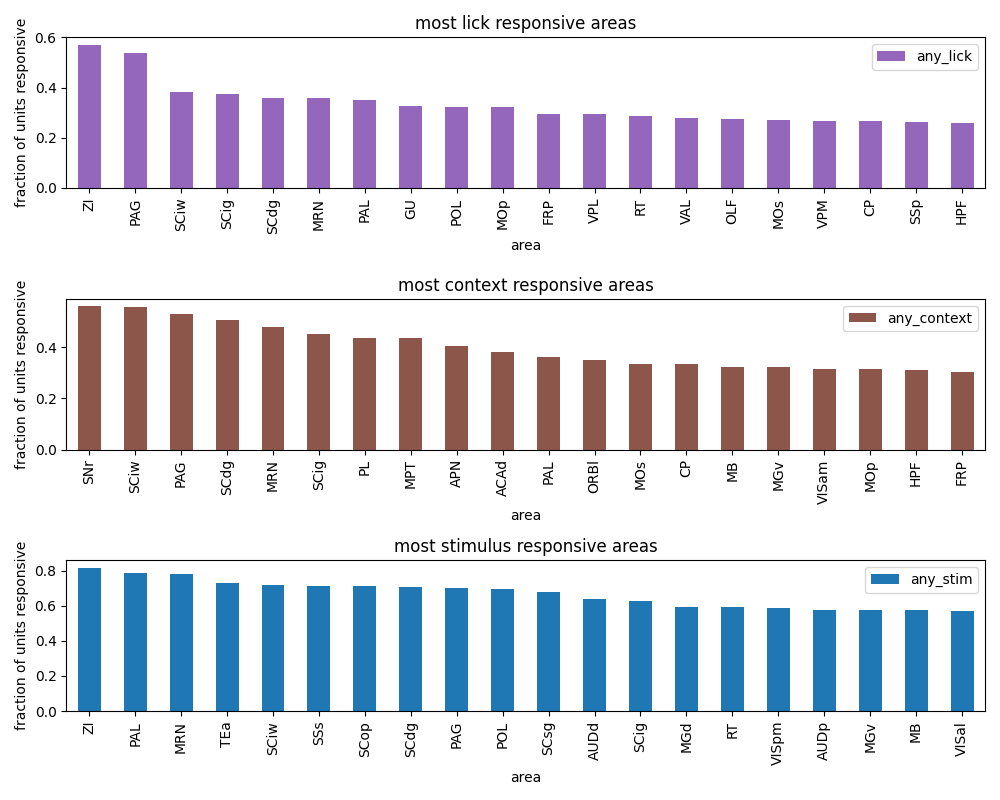

In [11]:
#lick/context/stim:
fig,ax=plt.subplots(3,1,figsize=(10,8))
#lick: any lick
sort_by_lick=area_fraction_context_mod.query('total_n>=30 and n_sessions>=3').sort_values(by='any_lick',ascending=False).head(20)
sort_by_lick[['area','any_lick']].plot.bar(ax=ax[0],x='area',y='any_lick',color='tab:purple')
ax[0].set_title('most lick responsive areas')
ax[0].set_ylabel('fraction of units responsive')

#context: any context
sort_by_context=area_fraction_context_mod.query('total_n>=30 and n_sessions>=3').sort_values(by='any_context',ascending=False).head(20)
sort_by_context[['area','any_context']].plot.bar(ax=ax[1],x='area',y='any_context',color='tab:brown')
ax[1].set_title('most context responsive areas')
ax[1].set_ylabel('fraction of units responsive')

#stim: any stim
sort_by_stim=area_fraction_context_mod.query('total_n>=30 and n_sessions>=3').sort_values(by='any_stim',ascending=False).head(20)
sort_by_stim[['area','any_stim']].plot.bar(ax=ax[2],x='area',y='any_stim',color='tab:blue')
ax[2].set_title('most stimulus responsive areas')
ax[2].set_ylabel('fraction of units responsive')


fig.tight_layout()

## context modulation of stimulus responses

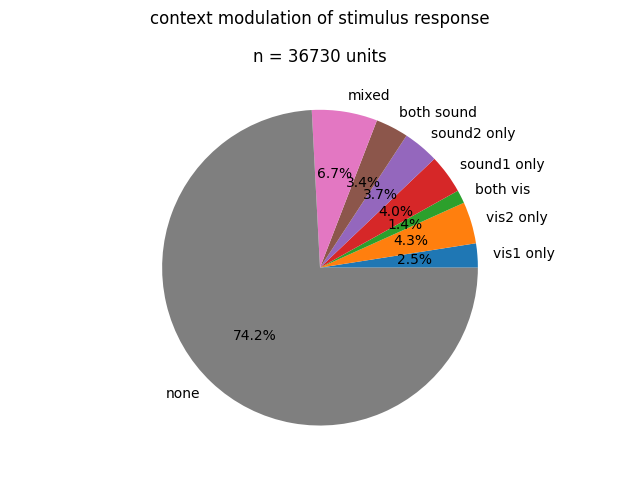

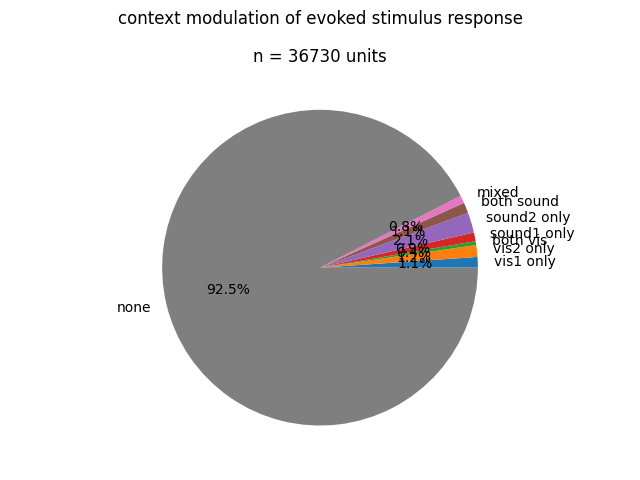

In [12]:
#plot stimulus responses modulated by context
plot_utils.plot_context_mod_stim_resp_pie_chart(adj_pvals,sel_project,savepath=None)

In [13]:
area_fraction_context_stim_mod=spike_utils.calculate_context_mod_stim_resp_by_area(sel_units,sel_project,plot_figures=False,savepath=None)

C:\Users\ethan.mcbride\Code\dynamic_routing_analysis\src\dynamic_routing_analysis\spike_utils.py:1601: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.023809523809523808' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  area_fraction_context_stim_mod.iloc[rr,1:-4]=row.iloc[1:-4]/row['n_stim_responsive']
C:\Users\ethan.mcbride\Code\dynamic_routing_analysis\src\dynamic_routing_analysis\spike_utils.py:1601: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.047619047619047616' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  area_fraction_context_stim_mod.iloc[rr,1:-4]=row.iloc[1:-4]/row['n_stim_responsive']
C:\Users\ethan.mcbride\Code\dynamic_routing_analysis\src\dynamic_routing_analysis\spike_utils.py:1601: FutureWarning: Setting an item of incompa

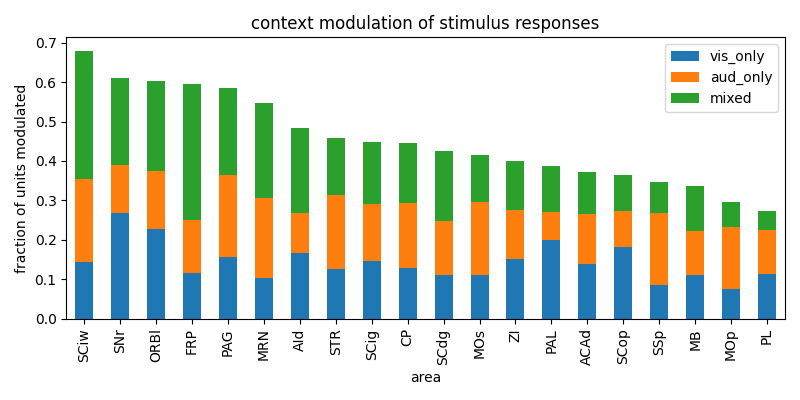

In [14]:
#context modulation of stimulus
fig,ax=plt.subplots(1,1,figsize=(8,4))
#vis: vis1+vis2+both_vis
vis_context_stim_mod=area_fraction_context_stim_mod[['vis1','vis2','both_vis']].sum(axis=1)
area_fraction_context_stim_mod['vis_only']=vis_context_stim_mod

#aud: sound1+sound2+both_sound
aud_context_stim_mod=area_fraction_context_stim_mod[['sound1','sound2','both_sound']].sum(axis=1)
area_fraction_context_stim_mod['aud_only']=aud_context_stim_mod

#total frac responsive
area_fraction_context_stim_mod['any_stim']=area_fraction_context_stim_mod[['vis1','vis2','sound1','sound2','mixed','both_vis','both_sound']].sum(axis=1)

sort_by_any_context_mod_stim=area_fraction_context_stim_mod.query('n_stim_responsive>=40 and n_sessions>=4 and not area.str.islower()').sort_values(by='any_stim',ascending=False).head(20)
sort_by_any_context_mod_stim[['area','vis_only','aud_only','mixed']].plot.bar(ax=ax,x='area',y=['vis_only','aud_only','mixed'],stacked=True)
ax.set_title('context modulation of stimulus responses')
ax.set_ylabel('fraction of units modulated')

fig.tight_layout()

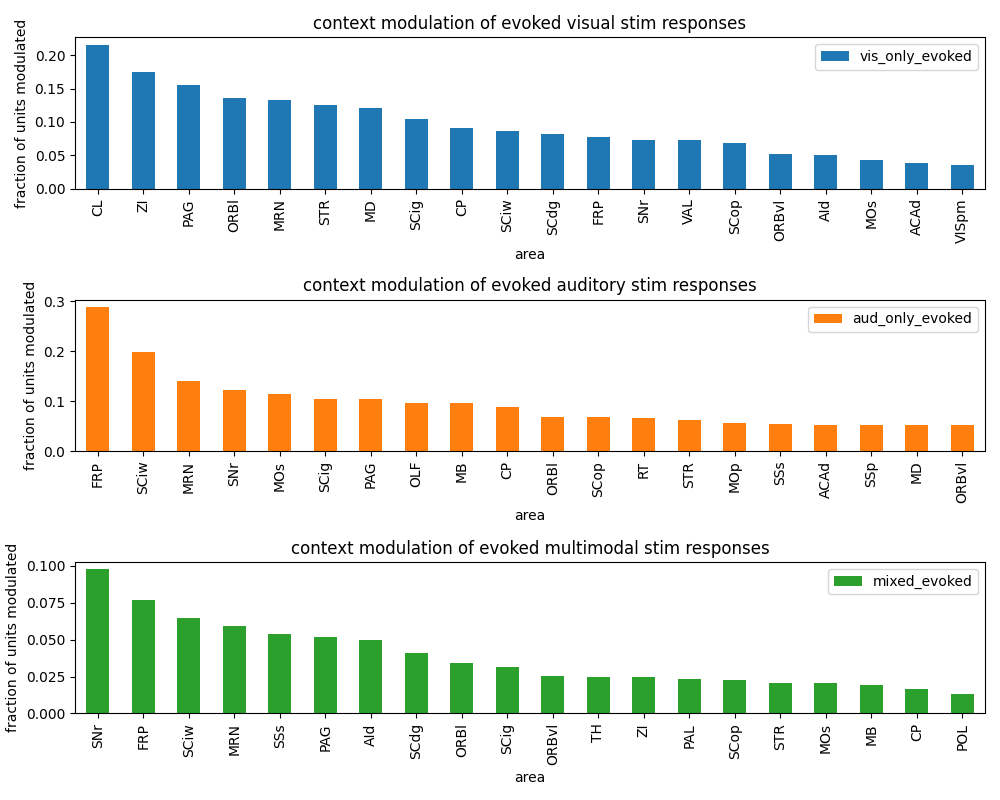

In [15]:
#context modulation of evoked stimulus
fig,ax=plt.subplots(3,1,figsize=(10,8))
#vis: vis1+vis2+both_vis
vis_context_evoked_stim_mod=area_fraction_context_stim_mod[['vis1_evoked','vis2_evoked','both_vis_evoked']].sum(axis=1)
area_fraction_context_stim_mod['vis_only_evoked']=vis_context_evoked_stim_mod
sort_by_vis_context_evoked_stim=area_fraction_context_stim_mod.query('n_stim_responsive>=30 and n_sessions>=3').sort_values(by='vis_only_evoked',ascending=False).head(20)
sort_by_vis_context_evoked_stim[['area','vis_only_evoked']].plot.bar(ax=ax[0],x='area',y='vis_only_evoked',color='tab:blue')
ax[0].set_title('context modulation of evoked visual stim responses')
ax[0].set_ylabel('fraction of units modulated')

#aud: sound1+sound2+both_sound
aud_context_evoked_stim_mod=area_fraction_context_stim_mod[['sound1_evoked','sound2_evoked','both_sound_evoked']].sum(axis=1)
area_fraction_context_stim_mod['aud_only_evoked']=aud_context_evoked_stim_mod
sort_by_aud_context_evoked_stim=area_fraction_context_stim_mod.query('n_stim_responsive>=30 and n_sessions>=3').sort_values(by='aud_only_evoked',ascending=False).head(20)
sort_by_aud_context_evoked_stim[['area','aud_only_evoked']].plot.bar(ax=ax[1],x='area',y='aud_only_evoked',color='tab:orange')
ax[1].set_title('context modulation of evoked auditory stim responses')
ax[1].set_ylabel('fraction of units modulated')

#mixed: mixed
sort_by_mixed_context_evoked_stim=area_fraction_context_stim_mod.query('n_stim_responsive>=30 and n_sessions>=3').sort_values(by='mixed_evoked',ascending=False).head(20)
sort_by_mixed_context_evoked_stim[['area','mixed_evoked']].plot.bar(ax=ax[2],x='area',y='mixed_evoked',color='tab:green')
ax[2].set_title('context modulation of evoked multimodal stim responses')
ax[2].set_ylabel('fraction of units modulated')

fig.tight_layout()